In [1]:
from migdalcalc import migdalcalc
from migdalcalc.migdal import kinematics as kin
from migdalcalc.migdal import ionization as ion
import numpy as np
import scipy.integrate as integrate
import scipy.interpolate as interp


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = False

In [2]:
Ar_migdal = migdalcalc.migdalcalc(target="Ar-40")
En = 1e7

angles = np.linspace(0, 180, 180)

237953.5990481856
sum: 0.028469600723067146


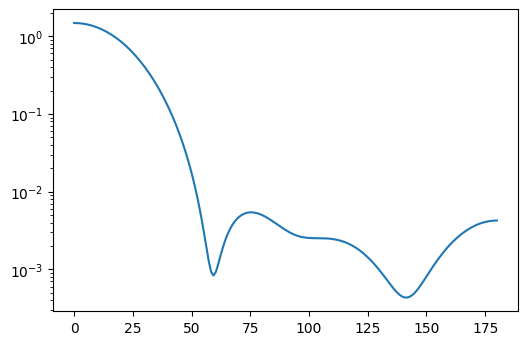

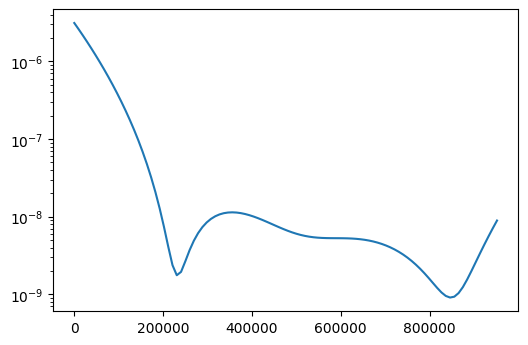

0.937199
0.9371990000000002
0.9371989999981255


In [3]:
Ar_total_xsec = Ar_migdal.nuc.SIG(En)

E0_ar = kin.E0(Ar_migdal.A, En)
print(E0_ar)

E_range = np.linspace(0, 4*E0_ar, 100)


Ar_dSig_dOmega = Ar_migdal.nuc.dSig_dOmega(En)
Ar_dSig_dEnr = Ar_migdal.nuc.dSig_dEnr(En)

calculated_xsec_cos = 2*np.pi*integrate.quad(Ar_dSig_dOmega, -1, 1)[0]

calculated_xsec_Enr = 2*np.pi*integrate.quad(Ar_dSig_dEnr, 0, 4*E0_ar)[0]


plt.plot(angles, Ar_dSig_dOmega(np.cos(np.pi*angles/180)))
plt.yscale('log')
plt.show()

plt.plot(E_range, Ar_dSig_dEnr(E_range))
plt.yscale('log')
plt.show()

print(Ar_total_xsec)
print(calculated_xsec_cos)
print(calculated_xsec_Enr)

In [6]:
Xe_migdal = migdalcalc.migdalcalc(target="Xe-131",nuclear_data_name='ENDFBVIII')
En_DT = 1.4e7

angles = np.linspace(0, 180, 180)

E0_xe = kin.E0(Xe_migdal.A, En_DT)

E_range = np.linspace(0, 4*E0_xe, 1000)



sum: 0.07496929168701172


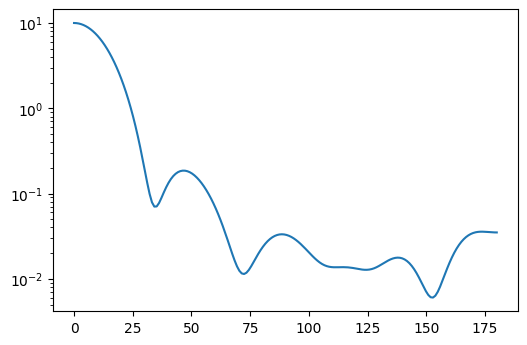

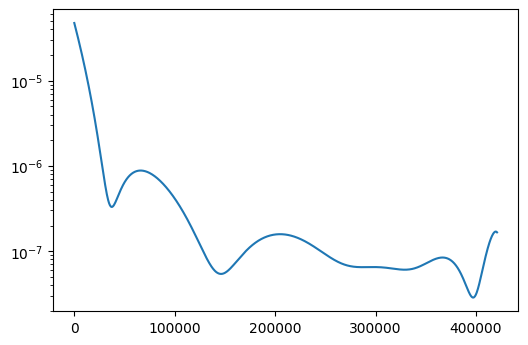

2.933323
2.9333229999999997
2.93332296982477


In [7]:
Xe_total_xsec = Xe_migdal.nuc.SIG(En_DT)

Xe_dSig_dOmega = Xe_migdal.nuc.dSig_dOmega(En_DT)
Xe_dSig_dEnr = Xe_migdal.nuc.dSig_dEnr(En_DT)

calculated_xsec_cos = 2*np.pi*integrate.quad(Xe_dSig_dOmega, -1, 1)[0]

calculated_xsec_Enr = 2*np.pi*integrate.quad(Xe_dSig_dEnr, 0, 4*E0_xe, limit=200)[0]


plt.plot(angles, Xe_dSig_dOmega(np.cos(np.pi*angles/180)))
plt.yscale('log')
plt.show()

plt.plot(E_range, Xe_dSig_dEnr(E_range))
plt.yscale('log')
plt.show()

print(Xe_total_xsec)
print(calculated_xsec_cos)
print(calculated_xsec_Enr)